# Table of Contents (Click to go to that section)

* [Documentation of Various Python Packages](#documentation) <br>
- [Loading Data](#data)
* [Latitude vs. Longitude Scatter Plot](#scatter)
- [KMeans Clustering Models](#models)
* [Line Plot of Change in Inertia vs. K](#inertia_plotting)
- [Optimal K with Elbow Method](#elbow_method)
* [Reverse Geocoding and Saving Clusters as Interactive Map](#final_step)

# Documentation for Python Packages (Bolded the Commonly Used Python Packages in Analytics)
<a id="documentation"></a>

* [**Scikit-learn**](https://scikit-learn.org/stable/user_guide.html): Python package for data science (I navigated to 2. unsupervised learning for KMeans Clustering)
* [Scikit-learn's KMeans (Clustering)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans): KMeans Clustering in Python
- [**Pandas** for Data Manipulation and Cleaning](https://pandas.pydata.org/docs/reference/frame.html): Link goes to DataFrames (made up of Series) -> common data structure for Excel and CSV files
* [**Matplotlib's Pyplot** for Data Viz](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html): Link goes directly to scatter plot documentation
- [**Numpy** for Calculations](https://numpy.org/doc/2.1/user/index.html): User guide shows all you can do with numpy
* [Geopy for Reverse Geocoding](https://geopy.readthedocs.io/en/stable/index.html#:~:text=geopy%20is%20a%20Python%20client%20for%20several%20popular%20geocoding%20web): Latitude and longitude transformed into city
- [Folium with Leaflet.js](https://python-visualization.github.io/folium/latest/): Interactive HTML map

# About the Dataset and Loading the Data [(Link to Dataset)](https://archive.ics.uci.edu/dataset/550/urbangb+urban+road+accidents+coordinates+labelled+by+the+urban+center)
<a id="data"></a>

The data is a text file with coordinates (longitude and latitude) of 360,177 road accidents that occurred in urban areas in Great Britain. The UC Irvine Machine Learning Repository advises to scale the longitude down by a factor of 1.7 for the purpose of geographical clustering. The link to the dataset is provided in the header.

In [1]:
import pandas as pd

data = pd.read_csv("data/urbanGB.txt",header = None)
data.rename(columns={0:"longitude",1:"latitude"}, inplace = True)
data.iloc[:, 0] = data.iloc[:, 0] / 1.7
    
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]} (longitude and latitude)")

Rows: 360177
Columns: 2 (longitude and latitude)


# Latitude vs. Longitude Scatter Plot
<a id="scatter"></a>

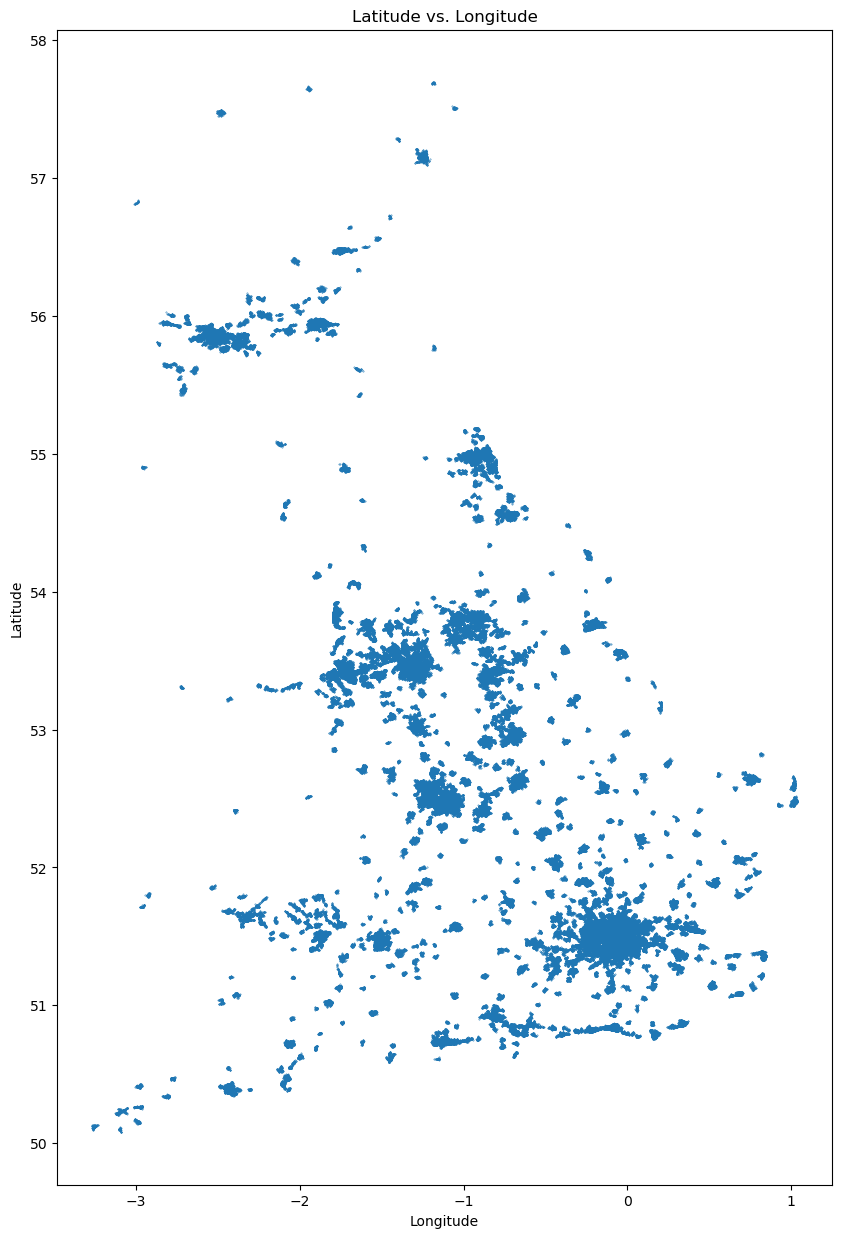

In [2]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,15) # adjusts the aspect ratio for all plots
                                  
plt.scatter('longitude','latitude',data=data, s= 0.1)
plt.title("Latitude vs. Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# KMeans Clustering with k = 2, 3, 4, 5, 6.

## Each Model gets the following:
* (a) cluster centers/means
<br>

* (b) size of each cluster
<br>

* (c) inertia (this is stored in the attribute inertia of the KMeans object)
* inertia: Sum of squared **distances of samples to their closest cluster center**, weighted by the sample weights if provided.
<br>

* (d) scatter plot of the clusters distinguished by different colors

<a id="models"></a>

## Model 2 (k = 2): upgrade threadpoolct1 if AttributeError: 'NoneType' object has no attribute 'split'

In [3]:
# !pip install --upgrade threadpoolctl

The model's cluster centers/means = [[-0.52505983 51.64608322]
 [-1.3069919  54.00354945]]
Cluster sizes = {0: 220307, 1: 139870}
Inertia = 371922.0511244789


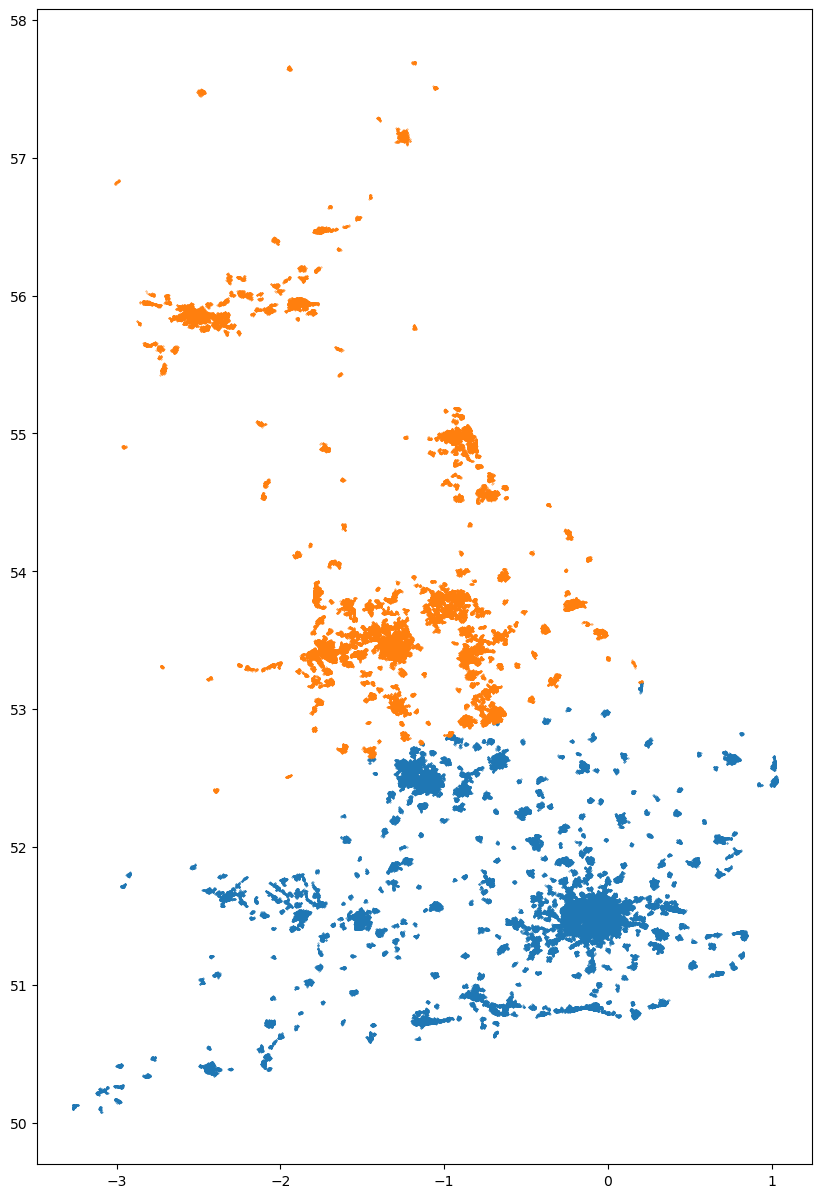

In [4]:
import numpy as np
from sklearn.cluster import KMeans

inertia_values = []

model2 = KMeans(n_clusters=2,n_init=10)
model2.fit(data)
yhat = model2.predict(data)

clusters2 = np.unique(yhat)

print(f"The model's cluster centers/means = {model2.cluster_centers_}")

labels = model2.labels_
unique, counts = np.unique(labels,return_counts=True)
cluster_sizes = dict(zip(unique,counts))
print(f"Cluster sizes = {cluster_sizes}")

print(f"Inertia = {model2.inertia_}")
inertia_values.append(model2.inertia_)

for cluster in clusters2:
    datai = data[model2.labels_ == cluster]
    plt.scatter('longitude' ,'latitude', data=datai, s=0.1)
plt.show()

## Model 3 (k = 3)

The model's cluster centers/means = [[-1.12736818 53.24476454]
 [-0.41586253 51.4612689 ]
 [-1.7873923  55.6150629 ]]
Cluster sizes = {0: 145665, 1: 181537, 2: 32975}
Inertia = 230299.11878484662


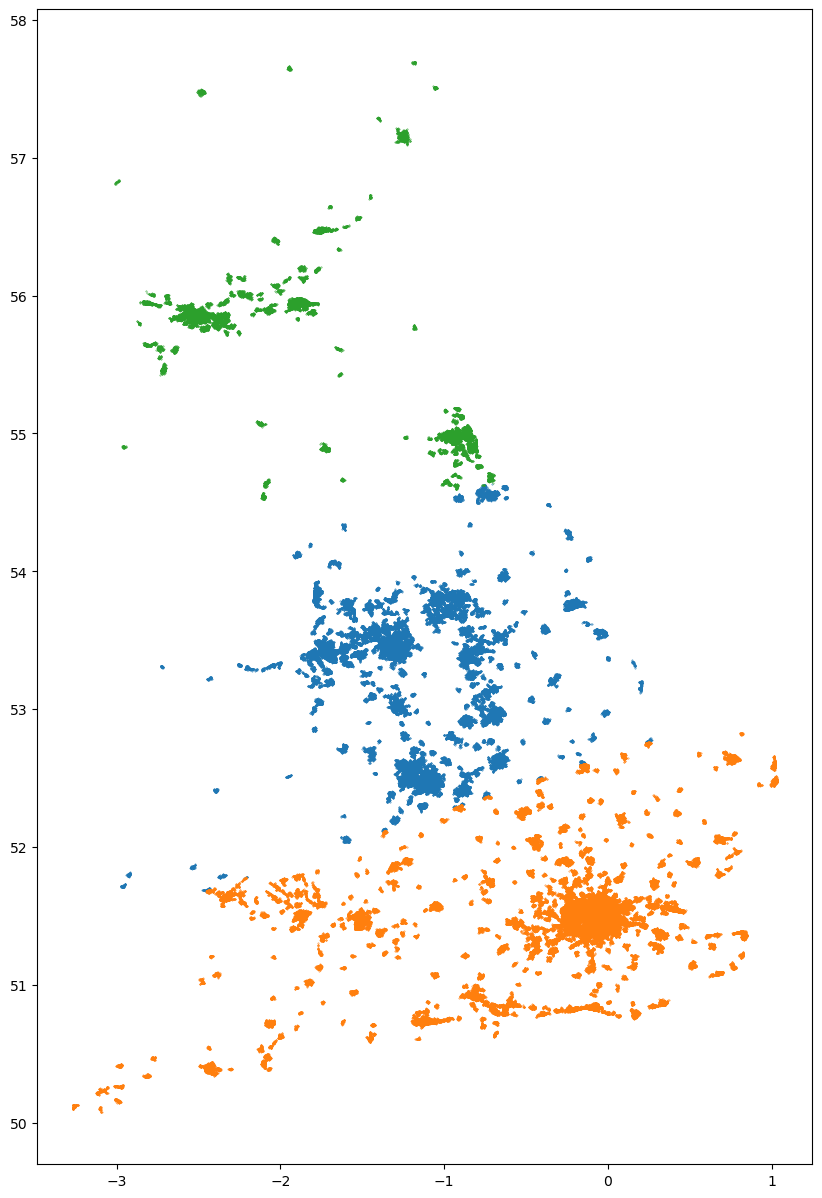

In [5]:
model3 = KMeans(n_clusters=3,n_init=10)
model3.fit(data)
yhat = model3.predict(data)

clusters3 = np.unique(yhat)

print(f"The model's cluster centers/means = {model3.cluster_centers_}")

labels = model3.labels_
unique, counts = np.unique(labels,return_counts=True)
cluster_sizes = dict(zip(unique,counts))
print(f"Cluster sizes = {cluster_sizes}")

print(f"Inertia = {model3.inertia_}")
inertia_values.append(model3.inertia_)

for cluster in clusters3:
    datai = data[model3.labels_ == cluster]
    plt.scatter('longitude' ,'latitude', data=datai, s=0.1)
plt.show()

## Model 4 (k = 4)

The model's cluster centers/means = [[-0.06798542 51.53610185]
 [-1.12049766 53.25252818]
 [-1.68030951 51.21011248]
 [-1.78745616 55.6151224 ]]
Cluster sizes = {0: 142176, 1: 144647, 2: 40387, 3: 32967}
Inertia = 145875.31445947237


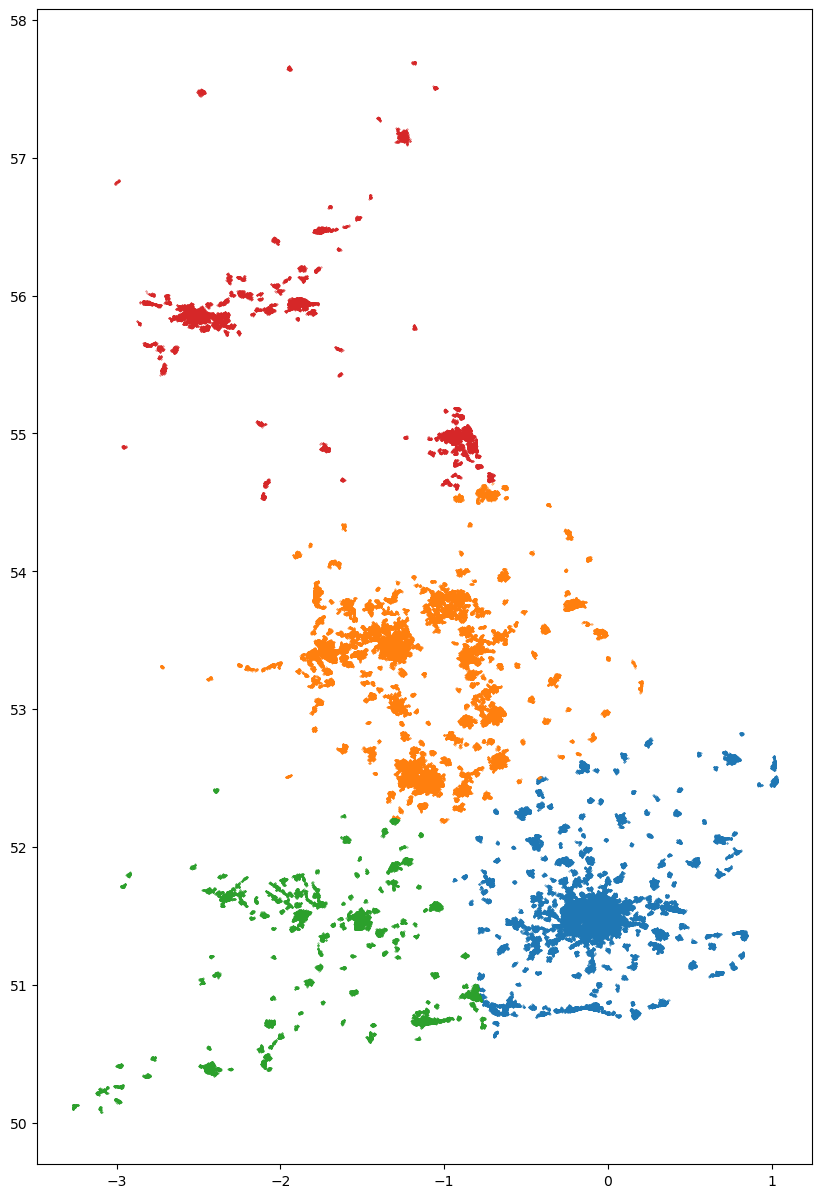

In [6]:
model4 = KMeans(n_clusters=4,n_init=10)
model4.fit(data)
yhat = model4.predict(data)

clusters4 = np.unique(yhat)

print(f"The model's cluster centers/means = {model4.cluster_centers_}")

labels = model4.labels_
unique, counts = np.unique(labels,return_counts=True)
cluster_sizes = dict(zip(unique,counts))
print(f"Cluster sizes = {cluster_sizes}")

print(f"Inertia = {model4.inertia_}")
inertia_values.append(model4.inertia_)

for cluster in clusters4:
    datai = data[model4.labels_ == cluster]
    plt.scatter('longitude' ,'latitude', data=datai, s=0.1)
plt.show()

## Model 5 (k = 5)

The model's cluster centers/means = [[-1.17362165 53.76107514]
 [-0.07676467 51.48944831]
 [-2.20928042 55.97039882]
 [-1.77615205 51.19710409]
 [-0.94593098 52.64627423]]
Cluster sizes = {0: 99441, 1: 140241, 2: 21851, 3: 35454, 4: 63190}
Inertia = 109585.35072209244


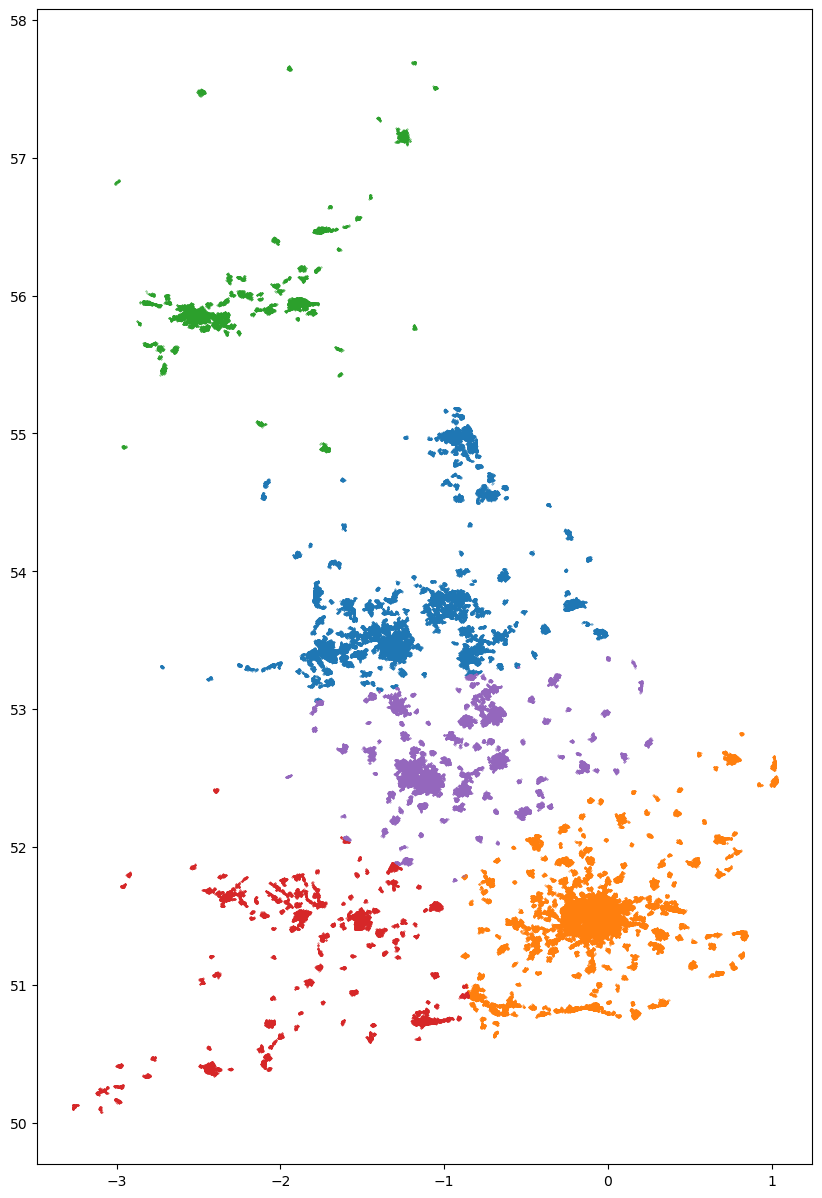

In [7]:
model5 = KMeans(n_clusters=5,n_init=10)
model5.fit(data)
yhat = model5.predict(data)

clusters5 = np.unique(yhat)

print(f"The model's cluster centers/means = {model5.cluster_centers_}")

labels = model5.labels_
unique, counts = np.unique(labels,return_counts=True)
cluster_sizes = dict(zip(unique,counts))
print(f"Cluster sizes = {cluster_sizes}")

print(f"Inertia = {model5.inertia_}")
inertia_values.append(model5.inertia_)

for cluster in clusters5:
    datai = data[model5.labels_ == cluster]
    plt.scatter('longitude' ,'latitude', data=datai, s=0.1)
plt.show()

## Model 6 (k = 6)

The model's cluster centers/means = [[-0.92703236 54.81265508]
 [-1.77001079 51.18954735]
 [-0.92050221 52.6070056 ]
 [-1.22591423 53.5516214 ]
 [-0.07403707 51.48957975]
 [-2.22629371 56.00156727]]
Cluster sizes = {0: 15565, 1: 35400, 2: 59171, 3: 89024, 4: 139835, 5: 21182}
Inertia = 88244.09014897556


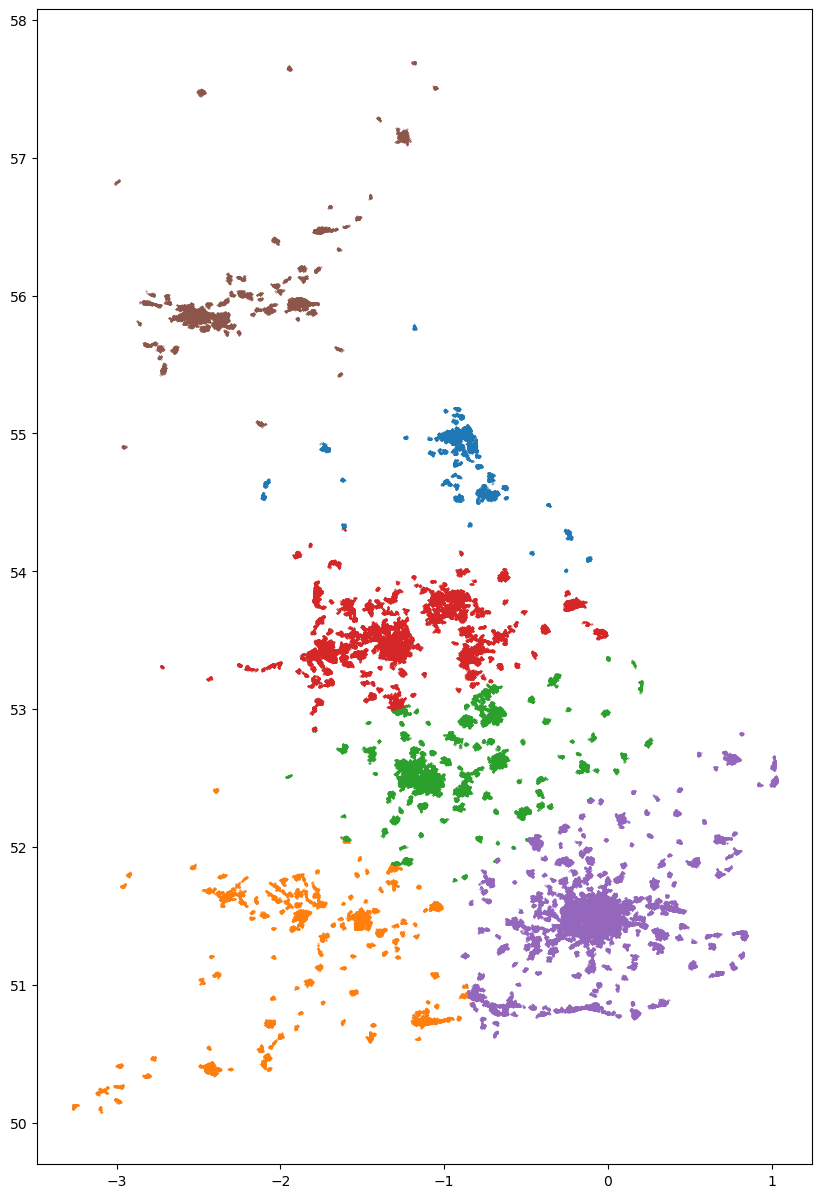

In [8]:
model6 = KMeans(n_clusters=6,n_init=10)
model6.fit(data)
yhat = model6.predict(data)

clusters6 = np.unique(yhat)

print(f"The model's cluster centers/means = {model6.cluster_centers_}")

labels = model6.labels_
unique, counts = np.unique(labels,return_counts=True)
cluster_sizes = dict(zip(unique,counts))
print(f"Cluster sizes = {cluster_sizes}")

print(f"Inertia = {model6.inertia_}")
inertia_values.append(model6.inertia_)

for cluster in clusters6:
    datai = data[model6.labels_ == cluster]
    plt.scatter('longitude' ,'latitude', data=datai, s=0.1)
plt.show()

# Line plot indicating how inertia changes as k varies.
<a id="inertia_plotting"></a>

Text(0, 0.5, 'Inertia')

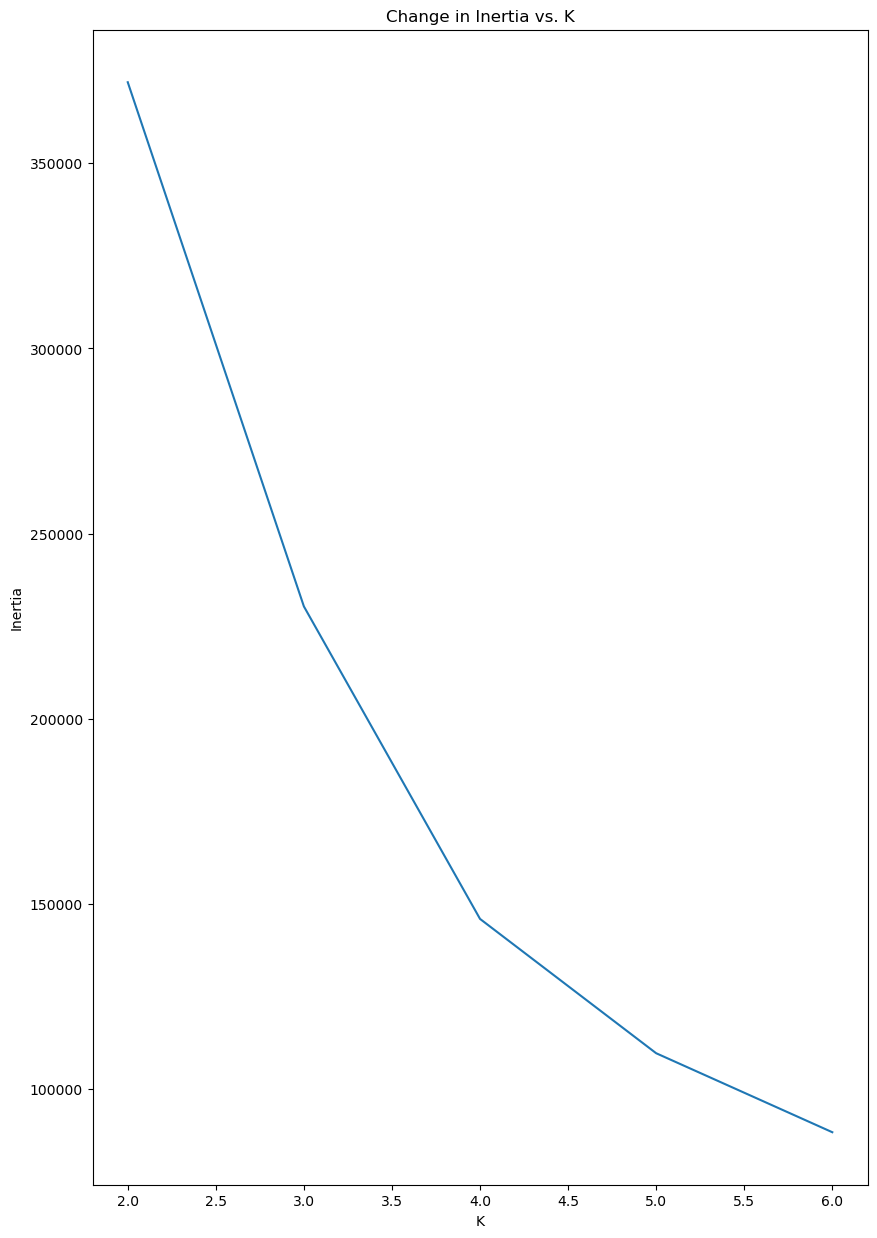

In [9]:
k_values = [2,3,4,5,6]
plt.plot([2,3,4,5,6],inertia_values)
plt.title("Change in Inertia vs. K")
plt.xlabel("K")
plt.ylabel("Inertia")

# Based on the line plot of inertia vs. k, which k value seems to be optimal with the elbow method (sharpest bend)?
<a id="elbow_method"></a>

Based on the line plot of inertia vs. k above, k=4 seems to be optimal since the plot exhibits the **sharpest bend at k=4.**

Inertia (y axis of graph above) is the sum of squared **distances of samples to their closest cluster center**.

# Based on the centers in model with optimal k, which urban cities/areas does each cluster center corresponds to?
<a id="final_step"></a>

## Reverse Geocoding (input latitude and longitude, output nearby city) with geopy package

In [12]:
# pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def get_nearby_cities(latitude, longitude):
    geolocator = Nominatim(user_agent="my_agent")
    tries = 0
    while tries < 3:
        try:
            location = geolocator.reverse(f"{latitude}, {longitude}")
            if location:
                address = location.raw['address']
                city = address.get('city', '')
                state = address.get('state', '')
                country = address.get('country', '')
                return f"{city}, {state}, {country}".strip(", ")
            return "No nearby city found"
        except GeocoderTimedOut:
            tries += 1
            time.sleep(1)
    return "Geocoding failed after multiple attempts"

centers_longitude = [num*1.7 for num in model4.cluster_centers_.T[0]]
centers_latitude = [num for num in model4.cluster_centers_.T[1]]
#print(f"unscaled longitudes = {center_longitude}")
#print(f"\nlatitudes = {center_latitude}\n")

for latitude, longitude in zip(centers_latitude,centers_longitude):
    nearby_city = get_nearby_cities(latitude, longitude)
    print(f"Cluster center coordinates: {latitude}, {longitude}")
    print(f"Nearby urban area: {nearby_city}\n")

Cluster center coordinates: 51.53610185198211, -0.11557521255943685
Nearby urban area: London, England, United Kingdom

Cluster center coordinates: 53.25252817672682, -1.9048460166632124
Nearby urban area: High Peak, England, United Kingdom

Cluster center coordinates: 51.21011247772718, -2.856526171302714
Nearby urban area: England, United Kingdom

Cluster center coordinates: 55.61512240118906, -3.0386754788121464
Nearby urban area: Alba / Scotland, United Kingdom



## Saving Clusters as Interactive Map with Markers (HTML file in current directory) via folium package

In [14]:
# pip install folium
import numpy as np
import folium
from folium.plugins import MarkerCluster

# Creates the interactive map
mean_lat = np.mean(centers_latitude)
mean_long = np.mean(centers_longitude)
cluster_center_map = folium.Map(location=[mean_lat, mean_long], zoom_start=4)

# Creates marker for each data pairing of latitude and longitude
for latitude, longitude in zip(centers_latitude,centers_longitude):
    nearby_city = get_nearby_cities(latitude, longitude)
    folium.Marker(
        location=[latitude, longitude],
        popup=f"Cluster Center<br>Nearby: {nearby_city}",
        icon=folium.Icon(color='red', icon='star')
    ).add_to(cluster_center_map)

cluster_center_map.save("cluster_map.html")
print("Map has been saved as 'cluster_map.html'. Open this file in a web browser to view the interactive map.")

Map has been saved as 'cluster_map.html'. Open this file in a web browser to view the interactive map.
